# Kenya Elections 2017

On August 8th, 2017 Kenya held general elections. This is the second one since a new constitution was signed into law back in 2010. As such, although it's the 12th National Assembly in which the people voted in Members of Parliament, it's the second race for Women representatives as well as second race for governors. For the unitiated, Kenya before the new constitution had 8 provinces whose heads were directly appointed by the President. While the provinces still remain, the new political units formed from the new legislation are 47 counties whose heads are elected governors. 

The analysis here is from data scraped from the [Independent Electoral and Boundaries Commission (IEBC) Website](https://public.rts.iebc.or.ke/results/results.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings

In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')

warnings.filterwarnings('ignore')

## Gubernatorial race

In [3]:
guber = pd.read_csv('gubernatorial_race_2017-08-19 23-54-16.csv')

In [4]:
print("Number of counties: {}".format(guber.county.count()))

Number of counties: 47



Let's see which counties have all the votes in from the polling stations

In [5]:
mask = ['county','reported_poll_stations', 'total_poll_stations']
data = guber[mask]
data = data[data.total_poll_stations== data.reported_poll_stations]
counties_report_full = list(data.county)
print("Number of counties with all votes back from all polling stations: {}".format(len(data)))
data

Number of counties with all votes back from all polling stations: 15


,county,reported_poll_stations,total_poll_stations
0,BARINGO,892,892
8,ISIOLO,195,195
18,KWALE,612,612
19,LAIKIPIA,531,531
20,LAMU,167,167
22,MAKUENI,1060,1060
24,MARSABIT,384,384
25,MERU,1473,1473
28,MURANG'A,1131,1131
31,NANDI,796,796


Does this have to do with the number of votes; maybe more vote counting more vote time? We will use the *registered_votes* field but it's essentially a proxy. Those who turn out to vote are normally much lower than these numbers

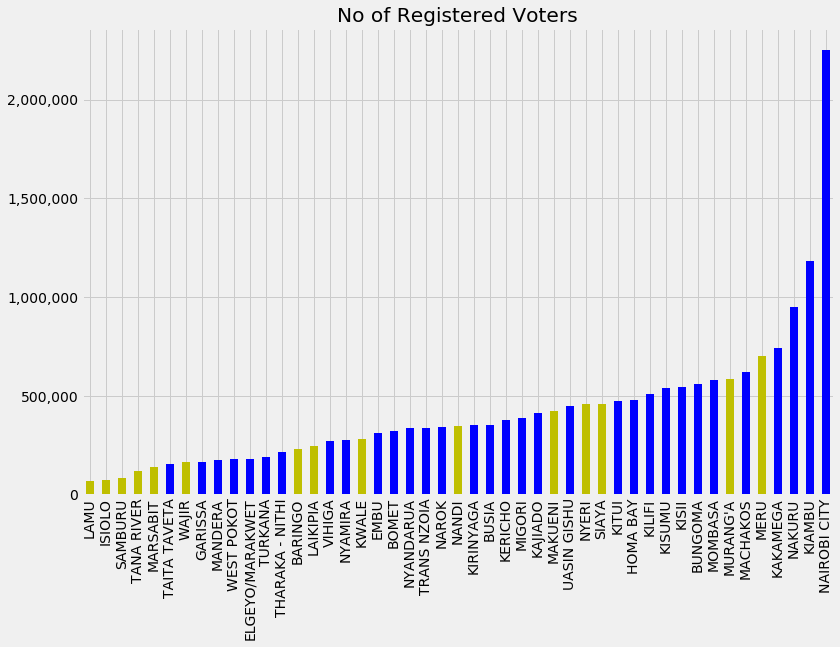

In [6]:
data =  guber[['county','registered_voters']]
data.sort_values(by='registered_voters', inplace = True)
color_full_vote = ['y' if county in counties_report_full else 'b' for county in data.county]


ax = data['registered_voters'].plot(kind="bar", figsize=(12,8), color=color_full_vote)
ax.set_xticklabels(data.county)
ax.get_yaxis().set_major_formatter(
ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('No of Registered Voters')
plt.show()


As expected, 5 of the 15 counties (in yellow) have the smallest number of registered voters. 
Though Meru has the 5th largest number of register voters and it still managed to have all its polling stations report back the numbers

### The winner has the highest number of votes in the gubernatorial race?


In [7]:
data = guber[['winner_name', 'county','votes_count']]
data[data.votes_count == data.votes_count.max()]

,winner_name,county,votes_count
29,MIKE SONKO MBUVI GIDION KIOKO,NAIROBI CITY,860567


### The winner that has the lowest number of votes in the gubernatorial race?


In [8]:
data = guber[['winner_name', 'county','votes_count']]
data[data.votes_count == data.votes_count.min()]

,winner_name,county,votes_count
8,MOHAMED ABDI KUTI,ISIOLO,22669
